In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
import statsmodels.api as sm  
import scipy.stats as stats

In [3]:
df=pd.read_csv("titanic_dataset.csv")  
df 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.drop("Name",axis=1,inplace=True)  
df.drop("Cabin",axis=1,inplace=True)  
df.drop("Ticket",axis=1,inplace=True)  
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [5]:
df["Age"]=df["Age"].fillna(df["Age"].median())  
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])  
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [6]:
from sklearn.preprocessing import OrdinalEncoder

In [7]:
embark=["C","S","Q"]  
emb=OrdinalEncoder(categories=[embark])  
df["Embarked"]=emb.fit_transform(df[["Embarked"]])  

In [8]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,1.0
1,2,1,1,female,38.0,1,0,71.2833,0.0
2,3,1,3,female,26.0,0,0,7.9250,1.0
3,4,1,1,female,35.0,1,0,53.1000,1.0
4,5,0,3,male,35.0,0,0,8.0500,1.0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,1.0
887,888,1,1,female,19.0,0,0,30.0000,1.0
888,889,0,3,female,28.0,1,2,23.4500,1.0
889,890,1,1,male,26.0,0,0,30.0000,0.0


In [22]:
#FUNCTION TRANSFORMATION:  
#Log Transformation  
np.log(df["Fare"]) 

C:\Users\Subramaniya pillai.B\anaconda3\envs\webapp\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0      1.981001
1      4.266662
2      2.070022
3      3.972177
4      2.085672
         ...   
886    2.564949
887    3.401197
888    3.154870
889    3.401197
890    2.047693
Name: Fare, Length: 891, dtype: float64

In [10]:
#ReciprocalTransformation 
np.reciprocal(df["Age"])

0      0.045455
1      0.026316
2      0.038462
3      0.028571
4      0.028571
         ...   
886    0.037037
887    0.052632
888    0.035714
889    0.038462
890    0.031250
Name: Age, Length: 891, dtype: float64

In [11]:
#Squareroot Transformation:  
np.sqrt(df["Embarked"])

0      1.000000
1      0.000000
2      1.000000
3      1.000000
4      1.000000
         ...   
886    1.000000
887    1.000000
888    1.000000
889    0.000000
890    1.414214
Name: Embarked, Length: 891, dtype: float64

In [12]:
#POWER TRANSFORMATION:  
df["Age _boxcox"], parameters=stats.boxcox(df["Age"])  
df  

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age _boxcox
0,1,0,3,male,22.0,1,0,7.2500,1.0,13.468119
1,2,1,1,female,38.0,1,0,71.2833,0.0,21.498728
2,3,1,3,female,26.0,0,0,7.9250,1.0,15.563417
3,4,1,1,female,35.0,1,0,53.1000,1.0,20.056110
4,5,0,3,male,35.0,0,0,8.0500,1.0,20.056110
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,1.0,16.076643
887,888,1,1,female,19.0,0,0,30.0000,1.0,11.845513
888,889,0,3,female,28.0,1,2,23.4500,1.0,16.586014
889,890,1,1,male,26.0,0,0,30.0000,0.0,15.563417


In [13]:
df["Pclass _boxcox"], parameters=stats.boxcox(df["Pclass"])    
df 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age _boxcox,Pclass _boxcox
0,1,0,3,male,22.0,1,0,7.2500,1.0,13.468119,3.376116
1,2,1,1,female,38.0,1,0,71.2833,0.0,21.498728,0.000000
2,3,1,3,female,26.0,0,0,7.9250,1.0,15.563417,3.376116
3,4,1,1,female,35.0,1,0,53.1000,1.0,20.056110,0.000000
4,5,0,3,male,35.0,0,0,8.0500,1.0,20.056110,3.376116
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,1.0,16.076643,1.359946
887,888,1,1,female,19.0,0,0,30.0000,1.0,11.845513,0.000000
888,889,0,3,female,28.0,1,2,23.4500,1.0,16.586014,3.376116
889,890,1,1,male,26.0,0,0,30.0000,0.0,15.563417,0.000000


In [14]:
df["Fare _yeojohnson"], parameters=stats.yeojohnson(df["Fare"])  
df 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age _boxcox,Pclass _boxcox,Fare _yeojohnson
0,1,0,3,male,22.0,1,0,7.2500,1.0,13.468119,3.376116,1.906724
1,2,1,1,female,38.0,1,0,71.2833,0.0,21.498728,0.000000,3.497640
2,3,1,3,female,26.0,0,0,7.9250,1.0,15.563417,3.376116,1.970459
3,4,1,1,female,35.0,1,0,53.1000,1.0,20.056110,0.000000,3.304258
4,5,0,3,male,35.0,0,0,8.0500,1.0,20.056110,3.376116,1.981680
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,1.0,16.076643,1.359946,2.326029
887,888,1,1,female,19.0,0,0,30.0000,1.0,11.845513,0.000000,2.916885
888,889,0,3,female,28.0,1,2,23.4500,1.0,16.586014,3.376116,2.745246
889,890,1,1,male,26.0,0,0,30.0000,0.0,15.563417,0.000000,2.916885


In [15]:
df["SibSp _yeojohnson"], parameters=stats.yeojohnson(df["SibSp"])  
df  

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age _boxcox,Pclass _boxcox,Fare _yeojohnson,SibSp _yeojohnson
0,1,0,3,male,22.0,1,0,7.2500,1.0,13.468119,3.376116,1.906724,0.323389
1,2,1,1,female,38.0,1,0,71.2833,0.0,21.498728,0.000000,3.497640,0.323389
2,3,1,3,female,26.0,0,0,7.9250,1.0,15.563417,3.376116,1.970459,-0.000000
3,4,1,1,female,35.0,1,0,53.1000,1.0,20.056110,0.000000,3.304258,0.323389
4,5,0,3,male,35.0,0,0,8.0500,1.0,20.056110,3.376116,1.981680,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,1.0,16.076643,1.359946,2.326029,-0.000000
887,888,1,1,female,19.0,0,0,30.0000,1.0,11.845513,0.000000,2.916885,-0.000000
888,889,0,3,female,28.0,1,2,23.4500,1.0,16.586014,3.376116,2.745246,0.323389
889,890,1,1,male,26.0,0,0,30.0000,0.0,15.563417,0.000000,2.916885,-0.000000


In [16]:
df["Parch _yeojohnson"], parameters=stats.yeojohnson(df["Parch"])  
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age _boxcox,Pclass _boxcox,Fare _yeojohnson,SibSp _yeojohnson,Parch _yeojohnson
0,1,0,3,male,22.0,1,0,7.2500,1.0,13.468119,3.376116,1.906724,0.323389,-0.000000
1,2,1,1,female,38.0,1,0,71.2833,0.0,21.498728,0.000000,3.497640,0.323389,-0.000000
2,3,1,3,female,26.0,0,0,7.9250,1.0,15.563417,3.376116,1.970459,-0.000000,-0.000000
3,4,1,1,female,35.0,1,0,53.1000,1.0,20.056110,0.000000,3.304258,0.323389,-0.000000
4,5,0,3,male,35.0,0,0,8.0500,1.0,20.056110,3.376116,1.981680,-0.000000,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,1.0,16.076643,1.359946,2.326029,-0.000000,-0.000000
887,888,1,1,female,19.0,0,0,30.0000,1.0,11.845513,0.000000,2.916885,-0.000000,-0.000000
888,889,0,3,female,28.0,1,2,23.4500,1.0,16.586014,3.376116,2.745246,0.323389,0.243296
889,890,1,1,male,26.0,0,0,30.0000,0.0,15.563417,0.000000,2.916885,-0.000000,-0.000000


In [17]:
#QUANTILE TRANSFORMATION  
from sklearn.preprocessing import QuantileTransformer   
qt=QuantileTransformer(output_distribution='normal',n_quantiles=891)  

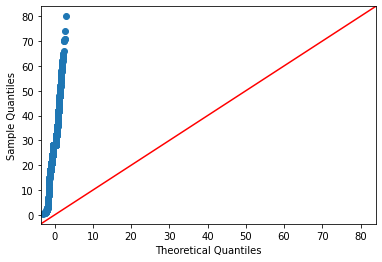

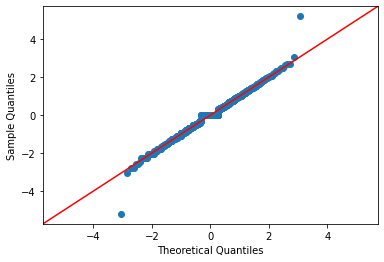

In [18]:
df["Age_1"]=qt.fit_transform(df[["Age"]])  
sm.qqplot(df['Age'],line='45')  
plt.show() 
sm.qqplot(df['Age_1'],line='45')  
plt.show()  

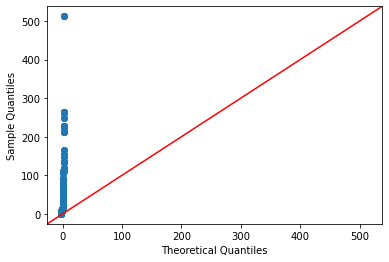

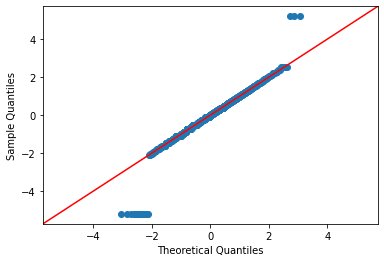

In [19]:
df["Fare_1"]=qt.fit_transform(df[["Fare"]])  
sm.qqplot(df["Fare"],line='45')  
plt.show()  
sm.qqplot(df['Fare_1'],line='45')  
plt.show()  

In [20]:
df.skew()

PassengerId          0.000000
Survived             0.478523
Pclass              -0.630548
Age                  0.510245
SibSp                3.695352
Parch                2.749117
Fare                 4.787317
Embarked            -0.147331
Age _boxcox          0.060508
Pclass _boxcox      -0.481963
Fare _yeojohnson    -0.040329
SibSp _yeojohnson    0.808608
Parch _yeojohnson    1.228795
Age_1               -0.005360
Fare_1              -0.928204
dtype: float64

In [21]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age _boxcox,Pclass _boxcox,Fare _yeojohnson,SibSp _yeojohnson,Parch _yeojohnson,Age_1,Fare_1
0,1,0,3,male,22.0,1,0,7.2500,1.0,13.468119,3.376116,1.906724,0.323389,-0.000000,-0.695859,-1.373288
1,2,1,1,female,38.0,1,0,71.2833,0.0,21.498728,0.000000,3.497640,0.323389,-0.000000,0.823696,1.202387
2,3,1,3,female,26.0,0,0,7.9250,1.0,15.563417,3.376116,1.970459,-0.000000,-0.000000,-0.391395,-0.644732
3,4,1,1,female,35.0,1,0,53.1000,1.0,20.056110,0.000000,3.304258,0.323389,-0.000000,0.662165,0.989391
4,5,0,3,male,35.0,0,0,8.0500,1.0,20.056110,3.376116,1.981680,-0.000000,-0.000000,0.662165,-0.537371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,1.0,16.076643,1.359946,2.326029,-0.000000,-0.000000,-0.337215,-0.110063
887,888,1,1,female,19.0,0,0,30.0000,1.0,11.845513,0.000000,2.916885,-0.000000,-0.000000,-0.957723,0.624066
888,889,0,3,female,28.0,1,2,23.4500,1.0,16.586014,3.376116,2.745246,0.323389,0.243296,-0.021125,0.285474
889,890,1,1,male,26.0,0,0,30.0000,0.0,15.563417,0.000000,2.916885,-0.000000,-0.000000,-0.391395,0.624066
